In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# Load data from local file
file_path = r"C:\Users\hvair\Downloads\archive\US_Accidents_March23.csv"
df = pd.read_csv(file_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(df.head())

# Display data types and missing values
print(df.info())
print(df.describe())

# Handling missing values
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
print(missing_percentages[missing_percentages > 0])










Dataset shape: (7728394, 46)
Columns: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2

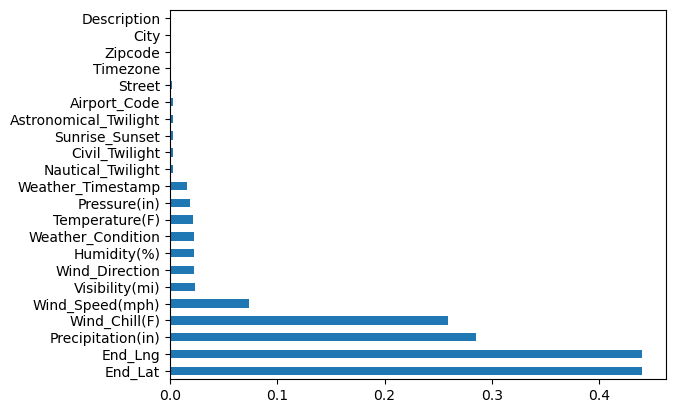

WARM: 4538372
COLD: 3026169


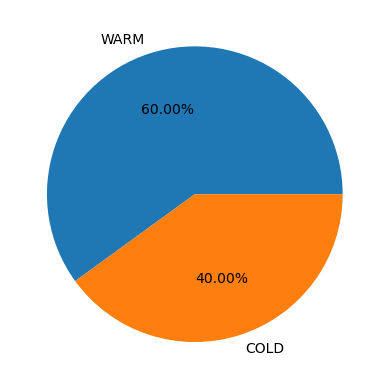

In [2]:
# Plotting missing values
missing_percentages[missing_percentages > 0].plot(kind='barh')
plt.show()

# Analysis based on Temperature
warm_temp = df[df['Temperature(F)'] > 58]
cold_temp = df[df['Temperature(F)'] <= 58]

print('WARM:', len(warm_temp))
print('COLD:', len(cold_temp))

# Pie chart for warm and cold temperatures
plt.pie([len(warm_temp), len(cold_temp)], autopct="%1.2f%%", labels=['WARM', 'COLD'])
plt.show()


CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: State, dtype: int64
['Miami', 'Houston', 'Los Angeles', 'Charlotte', 'Dallas', 'Orlando', 'Austin', 'Raleigh', 'Nashville', 'Baton Rouge', 'Atlanta', 'Sacramento', 'San Diego', 'Phoenix', 'Minneapolis', 'Richmond', 'Oklahoma City', 'Jacksonville', 'Tucson', 'Columbia', 'San Antonio', 'Greenville', 'Saint Paul', 'Seattle', 'Portland', 'San Jose', 'Indianapolis', 'Chicago', 'Tampa', 'Denver', 'Kansas City', 'Tulsa', 'Riverside', 'New Orleans', 'Bronx', 'Rochester', 'Fort Lauderdale', 'Detroit', 'Grand Rapids', 'Oakland', 'Dayton', 'Brooklyn', 'Columbus', 'San Bernardino', 'New York', 'Omaha', 'Bakersfield', 'Corona', 'Anaheim', 'Long Beach', 'Hialeah', 'Flint', 'Washington', 'Salt Lake City', 'Philadelphia', 'Lancaster', 'Fort Worth', 'Ontario', 'Fort Myers', 'San Francisco', 'Springfield', 'Fresno', 'Saint Louis', 'Birmingham', 'Chattanooga', 'Louisville', 'Whittier', 'Memphis', 'Lexington', 'Sarasota', 'El Paso

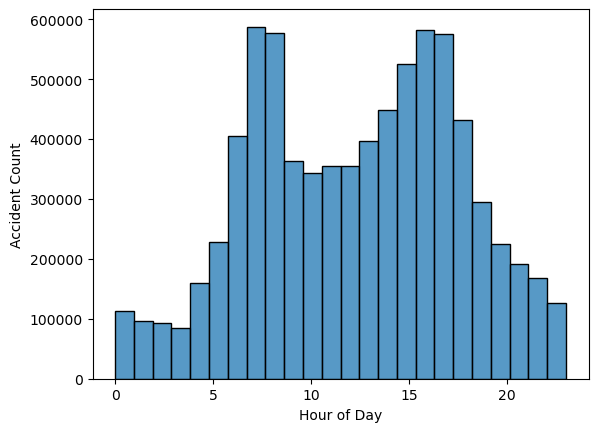

In [3]:
# Top 5 states with most accidents
top_5_states = df['State'].value_counts().head(5)
print(top_5_states)

# Top 100 cities with most accidents
top_100_cities = df['City'].value_counts().head(100).index.tolist()
print(top_100_cities)

# Accidents frequency by hour
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour

sns.histplot(df['Hour'], bins=24)
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.show()


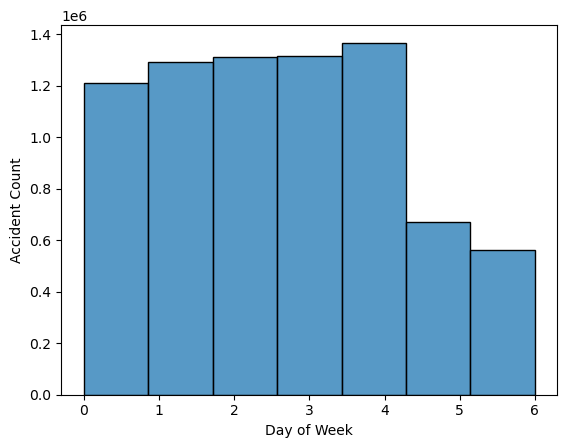

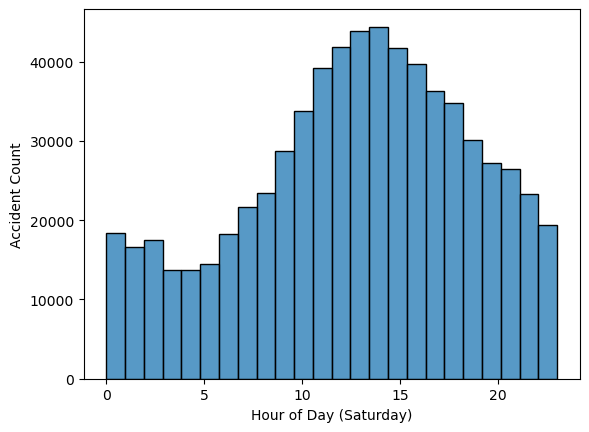

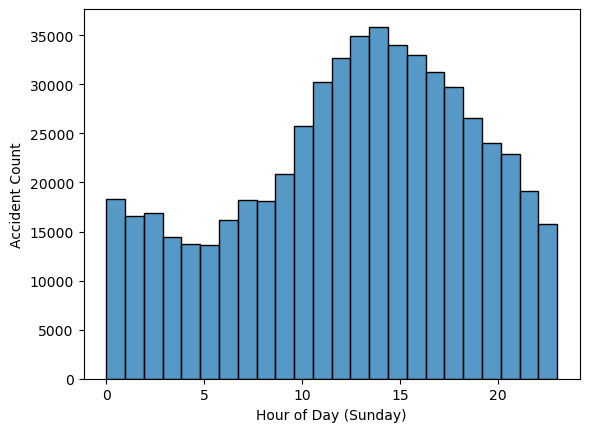

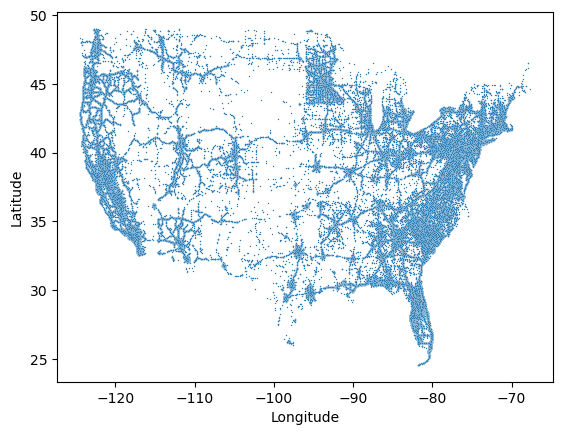

In [4]:
# Accidents frequency by day of week
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek

sns.histplot(df['DayOfWeek'], bins=7)
plt.xlabel('Day of Week')
plt.ylabel('Accident Count')
plt.show()

# Accidents on weekends (Saturday and Sunday)
weekend_df = df[df['DayOfWeek'].isin([5, 6])]

sns.histplot(weekend_df[weekend_df['DayOfWeek'] == 5]['Hour'], bins=24)
plt.xlabel('Hour of Day (Saturday)')
plt.ylabel('Accident Count')
plt.show()

sns.histplot(weekend_df[weekend_df['DayOfWeek'] == 6]['Hour'], bins=24)
plt.xlabel('Hour of Day (Sunday)')
plt.ylabel('Accident Count')
plt.show()

# Sample data for plotting
sample_df = df.sample(frac=0.1, random_state=42)

# Scatter plot for accident locations
sns.scatterplot(data=sample_df, x='Start_Lng', y='Start_Lat', s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()